# League of Legends v4.20 Deep Reinforcement Learning Agent

## Introduction

This Google Colab Notebook is created as a self-contained example for running League of Legends v4.20 DRL training with [pylol](https://github.com/MiscellaneousStuff/pylol) library.
To use it, simply execute each cell below one by one.

## GPU Acceleration

Google Colab provides free Tesla K80 GPU with their environment.  
To enable it, go to **Runtime -> Change Runtime Type** and then choose **GPU** from **Hardware acceleration** choice box.

# Installation

## GameServer (from source)

#### Install .NET

In [11]:
!wget https://packages.microsoft.com/config/ubuntu/18.04/packages-microsoft-prod.deb -O packages-microsoft-prod.deb
!sudo dpkg -i packages-microsoft-prod.deb

--2021-06-23 14:53:02--  https://packages.microsoft.com/config/ubuntu/18.04/packages-microsoft-prod.deb
Resolving packages.microsoft.com (packages.microsoft.com)... 13.90.56.68
Connecting to packages.microsoft.com (packages.microsoft.com)|13.90.56.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3132 (3.1K) [application/octet-stream]
Saving to: ‘packages-microsoft-prod.deb’

packages-microsoft- 100%[===================>]   3.06K  --.-KB/s    in 0s      

2021-06-23 14:53:02 (543 MB/s) - ‘packages-microsoft-prod.deb’ saved [3132/3132]

(Reading database ... 163635 files and directories currently installed.)
Preparing to unpack packages-microsoft-prod.deb ...
Unpacking packages-microsoft-prod (1.0-ubuntu18.04.2) over (1.0-ubuntu18.04.2) ...
Setting up packages-microsoft-prod (1.0-ubuntu18.04.2) ...


#### Install the Runtime

In [12]:
!sudo apt-get update; \
  sudo apt-get install -y apt-transport-https && \
  sudo apt-get update && \
  sudo apt-get install -y dotnet-sdk-3.1

Hit:1 https://packages.microsoft.com/ubuntu/18.04/prod bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRe

#### Clone GameServer

In [13]:
!rm -rf LeagueSandbox-RL-Learning
!git clone https://github.com/MiscellaneousStuff/LeagueSandbox-RL-Learning
!cd LeagueSandbox-RL-Learning && git checkout master && git branch && git submodule init && git submodule update

Cloning into 'LeagueSandbox-RL-Learning'...
remote: Enumerating objects: 49486, done.
remote: Counting objects: 100% (49486/49486), done.
remote: Compressing objects: 100% (11489/11489), done.
remote: Total 49486 (delta 27228), reused 49406 (delta 27157), pack-reused 0
Receiving objects: 100% (49486/49486), 11.43 MiB | 20.74 MiB/s, done.
Resolving deltas: 100% (27228/27228), done.
Already on 'master'
Your branch is up to date with 'origin/master'.
* master
Submodule 'Content/LeagueSandbox-Default' (https://github.com/LeagueSandbox/LeagueSandbox-Default.git) registered for path 'Content/LeagueSandbox-Default'
Submodule 'LeaguePackets' (https://github.com/LeagueSandbox/LeaguePackets) registered for path 'LeaguePackets'
Cloning into '/content/LeagueSandbox-RL-Learning/Content/LeagueSandbox-Default'...
Cloning into '/content/LeagueSandbox-RL-Learning/LeaguePackets'...
Submodule path 'Content/LeagueSandbox-Default': checked out '9121716e04ed25afb1bcdcb4f16860dfe1d15da1'
Submodule path 'Leag

### Build GameServer

In [14]:
!cd LeagueSandbox-RL-Learning  && dotnet build .

==Microsoft (R) Build Engine version 16.7.2+b60ddb6f4 for .NET
Copyright (C) Microsoft Corporation. All rights reserved.

==  Determining projects to restore...
  Restored /content/LeagueSandbox-RL-Learning/GameServerCore/GameServerCore.csproj (in 568 ms).
/content/LeagueSandbox-RL-Learning/PacketDefinitionsTests/PacketDefinitionsTests.csproj : warning NU1701: Package 'ENetSharpLeague 1.2.1-beta' was restored using '.NETFramework,Version=v4.6.1, .NETFramework,Version=v4.6.2, .NETFramework,Version=v4.7, .NETFramework,Version=v4.7.1, .NETFramework,Version=v4.7.2, .NETFramework,Version=v4.8' instead of the project target framework '.NETCoreApp,Version=v3.0'. This package may not be fully compatible with your project. [/content/LeagueSandbox-RL-Learning/GameServer.sln]
/content/LeagueSandbox-RL-Learning/PacketDefinitions420/PacketDefinitions420.csproj : warning NU1701: Package 'ENetSharpLeague 1.2.1-beta' was restored using '.NETFramework,Version=v4.6.1, .NETFramework,Version=v4.6.2, .

#### Run GameServer to Generate Configs

In [15]:
!cd /content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/ && \
/content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/GameServerConsole --redis_port 6379

[2021-06-23 14:53:34,993] [1] DEBUG LeagueSandbox.GameServer.Content.Package - Package LeagueSandbox-Scripts does not contain Items, skipping...
[2021-06-23 14:53:35,016] [1] DEBUG LeagueSandbox.GameServer.Content.Package - Package LeagueSandbox-Scripts does not contain Maps, skipping...
[2021-06-23 14:53:35,016] [1] DEBUG LeagueSandbox.GameServer.Content.Package - Package LeagueSandbox-Scripts does not contain Spells, skipping...
[2021-06-23 14:53:35,016] [1] DEBUG LeagueSandbox.GameServer.Content.Package - Package LeagueSandbox-Scripts does not contain Stats, skipping...
[2021-06-23 14:53:35,018] [1] DEBUG LeagueSandbox.GameServer.Content.Package - Package: LeagueSandbox-Scripts does not contain any items, skipping...
[2021-06-23 14:53:38,388] [1] DEBUG LeagueSandbox.GameServer.Content.Package - Loaded all C# scripts from package: LeagueSandbox-Scripts
[2021-06-23 14:53:38,388] [1] DEBUG LeagueSandbox.GameServer.Content.ContentManager - Loaded package with name: LeagueSandbox-Scripts

## PyLoL (from source)

In [16]:
!git clone -v https://github.com/MiscellaneousStuff/pylol.git
!pip3 install --upgrade pylol/

fatal: destination path 'pylol' already exists and is not an empty directory.
Processing ./pylol
  Created wheel for pylol-rl: filename=pylol_rl-1.0.0-cp37-none-any.whl size=69622 sha256=7ec445397de6874bbbaa2544b22ed2af3f35874ea87417f2e56958afe9981b51
  Stored in directory: /tmp/pip-ephem-wheel-cache-65y1ab8g/wheels/0f/d2/a3/ae889c0d5a98d8b2da27cb08dfffca4c1eaa796cfba2fabc0e
Successfully built pylol-rl
  Found existing installation: pylol-rl 1.0.0
    Uninstalling pylol-rl-1.0.0:
      Successfully uninstalled pylol-rl-1.0.0


## Test PyLoL

### Install Redis Client (Python) and Redis Server (Linux)

In [17]:
!pip3 install redis
!sudo apt-get install redis-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
redis-server is already the newest version (5:4.0.9-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 74 not upgraded.


#### Write Config Dirs (just GameServer for now)

In [18]:
# Only need to write config for GameServer here as we don't use the League Client within Colab environment
!touch config_dirs.txt
!printf "[dirs]\ngameserver = /content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/\nlolclient = " > config_dirs.txt

### Run Test

#### Test PyLoL on Local IP

In [1]:
# Get local IP
host = !hostname -i
host = host[0]

# Run Client
!python3 -m pylol.bin.client --max_steps 100 --host $host --agent scripted --config_path "config_dirs.txt"

GAMESERVER DIR: /content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/
CLIENT DIR: 
List of Run Configs: {'Linux': <class 'pylol.run_configs.platforms.Linux'>}
I0623 14:54:58.601449 140233433053056 lol_env.py:158] Ports used for GameServer and Redis respectively: [20407, 20408]
Local Base kwargs: {'host': '172.28.0.2', 'human_observer': False, 'players': [Agent(champ='Ezreal', team='BLUE'), Agent(champ='Ezreal', team='PURPLE')], 'map_name': 'Old Summoners Rift', 'cooldowns_enabled': False, 'manacosts_enabled': False, 'minion_spawns_enabled': False, 'game_server_dir': '/content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/', 'client_dir': '', 'multiplier': 7.5, 'step_multiplier': 1.0, 'client_port': 20407, 'redis_port': 20408}
kwargs process: {'human_observer': False, 'players': [Agent(champ='Ezreal', team='BLUE'), Agent(champ='Ezreal', team='PURPLE')], 'map_name': 'Old Summoners Rift', 'cooldowns_enabled': False, 'manacosts_enabled': False,

#### Test PyLoL with a Custom Agent

In [2]:
# Imports
from pylol.env import lol_env
from pylol.env import run_loop
from pylol.agents import base_agent
from pylol.lib import actions

# Settings
feature_map_size = 16000
feature_move_range = 8
player_list = "Ezreal.BLUE,Ezreal.PURPLE" # Comma-separated list of `Player.Team`
map = "Old Summoners Rift" # ["New Summoners Rift", "Howling Abyss"]
max_steps = 100 # 100 steps / 7.5 steps (a second) = 13.33 seconds
max_episodes = 0 # When set to 0, ignores this variable
host = !hostname -i
host = host[0]
config_path = "/content/config_dirs.txt"

# Define Agent Here
class CustomAgent(base_agent.BaseAgent):
  def step(self, obs):
    super(CustomAgent, self).step(obs)

    # Get the position of the enemy agent
    enemy_position = [obs.observation["enemy_unit"].position_x,
                      obs.observation["enemy_unit"].position_y]
    
    # Print the enemy agents HP with our user id
    print("My ID, Enemy HP: %d %f" % \
          (obs.observation["me_unit"].user_id,
           obs.observation["enemy_unit"].current_hp))

    # Ezreal Q at the enemy agents position
    return actions.FunctionCall(2, [[0], enemy_position])

# Setup the Game
players = []
agents = []
for player in player_list.split(","):
  c, t = player.split(".")
  players.append(lol_env.Agent(champion=c, team=t))
  agents.append(CustomAgent())

# Run the Game
with lol_env.LoLEnv(
  host=host,
  map_name=map,
  players=players,
  agent_interface_format=lol_env.parse_agent_interface_format(
    feature_map=feature_map_size,
    feature_move_range=feature_move_range
  ),
  human_observer=False,
  cooldowns_enabled=False,
  config_path=config_path) as env:

    run_loop.run_loop(agents, env, max_episodes=max_episodes, max_steps=max_steps)

GAMESERVER DIR: /content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/
CLIENT DIR: 
List of Run Configs: {'Linux': <class 'pylol.run_configs.platforms.Linux'>}
Local Base kwargs: {'host': '172.28.0.2', 'human_observer': False, 'players': [Agent(champ='Ezreal', team='BLUE'), Agent(champ='Ezreal', team='PURPLE')], 'map_name': 'Old Summoners Rift', 'cooldowns_enabled': False, 'manacosts_enabled': False, 'minion_spawns_enabled': False, 'game_server_dir': '/content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/', 'client_dir': '', 'multiplier': 7.5, 'step_multiplier': 1, 'client_port': 24992, 'redis_port': 24993}
kwargs process: {'human_observer': False, 'players': [Agent(champ='Ezreal', team='BLUE'), Agent(champ='Ezreal', team='PURPLE')], 'map_name': 'Old Summoners Rift', 'cooldowns_enabled': False, 'manacosts_enabled': False, 'minion_spawns_enabled': False, 'game_server_dir': '/content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netco

## Download LoL Client, Wine and Winetrick

### Download LoL Client

In [3]:
!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vkrdzSxTN6FPP7A9R65bIEBNefU7vDJL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vkrdzSxTN6FPP7A9R65bIEBNefU7vDJL" -O league-of-legends-420.tar.gz && rm -rf /tmp/cookies.txtInstall Winetricks

--2021-06-23 14:56:03--  https://docs.google.com/uc?export=download&confirm=j6vj&id=1vkrdzSxTN6FPP7A9R65bIEBNefU7vDJL
Resolving docs.google.com (docs.google.com)... 172.217.13.238, 2607:f8b0:4004:837::200e
Connecting to docs.google.com (docs.google.com)|172.217.13.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-8o-docs.googleusercontent.com/docs/securesc/n6eh750j8qco6e5hao8njaid5uh8j84s/cntemkgsfhffiuosab906b166lgc9k3g/1624460100000/06078080031886306713/02692430993219741067Z/1vkrdzSxTN6FPP7A9R65bIEBNefU7vDJL?e=download [following]
--2021-06-23 14:56:03--  https://doc-14-8o-docs.googleusercontent.com/docs/securesc/n6eh750j8qco6e5hao8njaid5uh8j84s/cntemkgsfhffiuosab906b166lgc9k3g/1624460100000/06078080031886306713/02692430993219741067Z/1vkrdzSxTN6FPP7A9R65bIEBNefU7vDJL?e=download
Resolving doc-14-8o-docs.googleusercontent.com (doc-14-8o-docs.googleusercontent.com)... 172.217.13.65, 2607:f8b0:4004:808::2001
Connecting to doc-14

### Install Wine

In [4]:
!sudo dpkg --add-architecture i386
!sudo apt update -y
!sudo apt install wine64 wine32 -y

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://packages.microsoft.com/ubuntu/18.04/prod bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security/restricted i386 Packages [23.3 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe i386 Packages [1,233 kB]
Hit:13 http://ppa.

### Install Winetricks

In [5]:
!sudo apt-get install winetricks -y
!winetricks d3dx9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en cabextract dictionaries-common emacsen-common enchant
  gstreamer1.0-gl gstreamer1.0-plugins-good gstreamer1.0-pulseaudio
  gstreamer1.0-x hunspell-en-us libaa1 libaspell15 libbrotli1 libdv4
  libenchant1c2a libgpm2 libgraphene-1.0-0 libgstreamer-gl1.0-0
  libgstreamer-plugins-good1.0-0 libhunspell-1.6-0 libhyphen0
  libjavascriptcoregtk-4.0-18 libmspack0 libnotify4 libsecret-1-0
  libsecret-common libshout3 libtag1v5 libtag1v5-vanilla libtext-iconv-perl
  libwebkit2gtk-4.0-37 libwoff1 notification-daemon zenity zenity-common
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libdv-bin oss-compat libenchant-voikko gpm
  libwebkit2gtk-4.0-37-gtk2 aria2 tor
The following NEW packages will be installed:
  aspell aspell-en cabextract dictionaries-common emacsen-commo

### Extract LoL Client

In [6]:
!tar -xzvf league-of-legends-420.tar.gz

Streaming output truncated to the last 5000 lines.
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/HA_AP_ShpNorth/Skins/Base/
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/HA_AP_ShpNorth/Skins/Base/Particles/
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/HA_AP_ShpSouth/
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/HA_AP_ShpSouth/Skins/
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/HA_AP_ShpSouth/Skins/Base/
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/HA_AP_ShpSouth/Skins/Base/Particles/
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/Hecarim/
League-of-Legends-4-20/RADS/projects/lol_game_client/filearchives/0.0.0.254/DATA/Characters/Hecarim/Scripts/
League-of-Legends-4-2

## Test League Client

### Install Virtual X Frame Buffer

In [7]:
!sudo apt-get install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 58 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 1s (1,213 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package xvfb.
(Reading database ... 170511 files and director

In [8]:
import os

s = """
XVFB=/usr/bin/Xvfb
XVFBARGS=":1 -screen 0 320x200x24 -ac +extension GLX +render -noreset"
PIDFILE=/var/run/xvfb.pid
case "$1" in
  start)
    export DISPLAY=:1
    echo -n "Starting virtual X frame buffer: Xvfb"
    start-stop-daemon --start --quiet --pidfile $PIDFILE --make-pidfile --background --exec $XVFB -- $XVFBARGS
    echo "."
    ;;
  stop)
    echo -n "Stopping virtual X frame buffer: Xvfb"
    start-stop-daemon --stop --quiet --pidfile $PIDFILE
    rm $PIDFILE
    echo "."
    ;;
  restart)
    $0 stop
    $0 start
    ;;
  *)
        echo "Usage: /etc/init.d/xvfb {start|stop|restart}"
        exit 1
esac

exit 0
"""

with open("./start_xvfb.sh", "w") as f:
  f.write(s)

game_cfg = """
[General]
GameMouseSpeed=4
UserSetResolution=1
EnableAudio=0
BindSysKeys=0
SnapCameraOnRespawn=1
OSXMouseAcceleration=1
AutoAcquireTarget=1
EnableLightFx=0
WindowMode=1
ShowTurretRangeIndicators=1
PredictMovement=0
WaitForVerticalSync=0
Colors=24
Height=200
Width=320
SystemMouseSpeed=0
CfgVersion=4.20.315

[HUD]
ItemShopPrevY=58
ItemShopPrevX=-218
NameTagDisplay=1
ShowChampionIndicator=0
ShowSummonerNames=1
ScrollSmoothingEnabled=0
MiddleMouseScrollSpeed=0.5000
MapScrollSpeed=0.5000
ShowAttackRadius=1
NumericCooldownFormat=1
SmartCastOnKeyRelease=0
EnableLineMissileVis=1
FlipMiniMap=0
ShowAllChannelChat=1
FlashScreenWhenStunned=0
ShowTimestamps=1
ChatScale=100
FlashScreenWhenDamaged=0
ItemShopResizeHeight=0
ItemShopResizeWidth=260
ItemShopPrevResizeHeight=960
ItemShopPrevResizeWidth=1280
ItemShopItemDisplayMode=1
ItemShopStartPane=1

[Performance]
ShadowsEnabled=0
CharacterInking=0
EnableHUDAnimations=0
PerPixelPointLighting=1
EnableParticleOptimizations=0
BudgetOverdrawAverage=10
BudgetSkinnedVertexCount=200000
BudgetSkinnedDrawCallCount=100
BudgetTextureUsage=150000
BudgetVertexCount=500000
BudgetTriangleCount=300000
BudgetDrawCallCount=1000
EnableGrassSwaying=1
EnableFXAA=0
AdvancedShader=0
FrameCapType=2
EffectsQuality=1
GammaEnabled=0
Full3DModeEnabled=1
EnvironmentQuality=1
CharacterQuality=1
AutoPerformanceSettings=0
ShadowQuality=0
GraphicsSlider=-1

[Volume]
PingsVolume=0.62
AmbienceVolume=0.58
MusicVolume=0.47
MasterVolume=0.41

[LossOfControl]
ShowSlows=0

[FloatingText]
Debug_Enabled=1
Absorbed_Enabled=1
OMW_Enabled=1
EnemyTrueDamageCritical_Enabled=1
EnemyMagicalDamageCritical_Enabled=1
EnemyPhysicalDamageCritical_Enabled=1
Experience_Enabled=1
TrueDamageCritical_Enabled=1
MagicalDamageCritical_Enabled=1
PhysicalDamageCritical_Enabled=1
ManaDamage_Enabled=1
ManaHeal_Enabled=1

[Replay]
EnableHelpTip=0
"""

# TODO: Write game_cfg
with open("/content/League-of-Legends-4-20/Config/game.cfg", "w") as f:
  f.write(game_cfg)

!chmod +x start_xvfb.sh
!./start_xvfb.sh start

Starting virtual X frame buffer: Xvfb.


### Run Client

In [9]:
!pip install pyautogui
!pip install Xlib

     |████████████████████████████████| 61kB 7.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133kB 35.4MB/s 
  Created wheel for pymsgbox: filename=PyMsgBox-1.0.9-cp37-none-any.whl size=7420 sha256=495b7f674df3aef092cfaeb5845256155cd114881b0bfc0117f923b1c007cdf5
  Stored in directory: /root/.cache/pip/wheels/16/d7/4e/fffdd54b1cca86608b7655c9a2854890a38f955ce9532848cd
  Created wheel for pyscreeze: filename=PyScreeze-0.1.27-cp37-none-any.whl size=12891 sha256=39e8e22a7f0e273a5605469dc660dc32a15f36cb55c33ca1f6e342a2433f9181
  Stored in directory: /root/.cache/pip/wheels/4d/c1/33/e7a099b5906e1110c51d32c957ad56df5a9976cd43153398df
Successfully built pymsgbox pyscreeze
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.52-cp37-none-any.whl

### Write Config Dirs (now set to GameServer and Client)

In [10]:
# Only need to write config for GameServer here as we don't use the League Client within Colab environment
!touch config_dirs.txt
!printf "[dirs]\ngameserver = /content/LeagueSandbox-RL-Learning/GameServerConsole/bin/Debug/netcoreapp3.0/\nlolclient = /content/League-of-Legends-4-20/RADS/solutions/lol_game_client_sln/releases/0.0.1.68/deploy/" > config_dirs.txt

In [11]:
import os
os.environ["DISPLAY"] = ":1"

# NOTE: Uncomment this if you want to test the environment before the
#       experiment
RUN_PYLOL_TEST = False

# Get local IP
host = !hostname -i
host = host[0]

# NOTE: You need to manually stop this cell when you want it to stop recording
#       Automating this process is a nightmare and not worth the effort
# NOTE: It takes about 1 minute to actually load into the game because colab
#       is running on 2 vCPUs which is the same as a single core CPU
# NOTE: The game is rendered at 320x200 because we only have software rendering
#       availabe. Surpringly, league adjusts it's HUD quite well to that resolution
#       so you can still more or less see what's going on.
# NOTE: Sometimes portpicker will pick an unavailable port, just restart this cell
#       if that happens

if RUN_PYLOL_TEST:
  !rm ./pylol_test.mp4
  !ffmpeg -f x11grab -video_size 320x200 -i :1 -r 10 ./pylol_test.mp4 & python3 -m pylol.bin.client --max_steps 250 --host $host --agent random --config_path "/content/config_dirs.txt" --run_client

In [12]:
if RUN_PYLOL_TEST:
  from IPython.display import HTML
  from base64 import b64encode
  mp4 = open('pylol_test.mp4','rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  HTML("""
  <video width=800 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

## Install LoLGym

In [13]:
!rm -rf lolgym # Delete old version in case we're experimenting with lolgym
!git clone https://github.com/MiscellaneousStuff/lolgym.git
!pip3 install -e lolgym/

Cloning into 'lolgym'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 143 (delta 88), reused 76 (delta 42), pack-reused 0
Receiving objects: 100% (143/143), 35.94 KiB | 11.98 MiB/s, done.
Resolving deltas: 100% (88/88), done.
Obtaining file:///content/lolgym
  Running setup.py develop for lolgym


# Training

Example task trains an agent to maximize it's distance from another agent by running away from it. Although this is a very simple task, it serves as a sanity test to prove that the environment and the A2C PPO model is working properly.

## Run Experiment

In [30]:
# NOTE: You need to manually stop this cell when you want it to stop recording
#       Automating this process is a nightmare and not worth the effort
# NOTE: It takes about 1 minute to actually load into the game because colab
#       is running on 2 vCPUs which is the same as a single core CPU
# NOTE: The game is rendered at 320x200 because we only have software rendering
#       availabe. Surpringly, league adjusts it's HUD quite well to that resolution
#       so you can still more or less see what's going on.
# NOTE: Sometimes portpicker will pick an unavailable port, just restart this cell
#       if that happens

# Ensure old experiment data and video is deleted
experiment_output = !ls | grep .txt | grep run_away
experiment_output = experiment_output[0] if experiment_output else ""
!rm experiment.mp4 $experiment_output

# Run Experiment!
epochs = 30 # Number of episodes to run experiment
!ffmpeg -f x11grab -video_size 320x200 -i :1 -r 10 ./experiment.mp4 & python3 ./lolgym/examples/full_game_ppo.py --config_path "/content/config_dirs.txt" --host $host --epochs $epochs

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## View Experiment Video

In [32]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('experiment.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Visualise Data

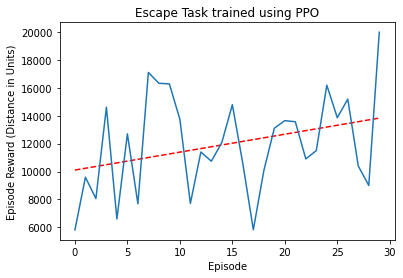

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get raw data from experiment logs
experiment_output = !ls | grep .txt | grep run_away
experiment_output = experiment_output[0]
with open(experiment_output) as f:
  rewards = list(filter(bool, f.read().split("+")))
  data = [float(d) for d in rewards]

# Plot Trendline (PPO can be noisy with low sample size
# so trendline makes graph clearer. Beware outliers)
x = range(len(data))
z = np.polyfit(x, data, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Plot Rewards
plt.xlabel("Episode")
plt.ylabel("Episode Reward (Distance in Units)")
plt.title("Escape Task trained using PPO")
plt.plot(data, label="Mean Episode Reward")